In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
long_data = pd.read_csv('long_format_annual_surface_temp.csv')
wide_data = pd.read_csv('wide_format_annual_surface_temp.csv')

In [378]:
long_data.sample(5)

,Country,ISO2,Year,Temperature
8024,Ghana,GH,F2005,0.967
3559,Niger,NE,F1980,0.518
10064,Mongolia,MN,F2016,1.391
6353,Bolivia,BO,F1996,0.290
3489,"Equatorial Guinea, Rep. of",GQ,F1980,0.289


In [379]:
wide_data.sample(5)

,Country,ISO2,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
63,Greenland,GL,-0.295,0.842,0.308,0.257,0.800,-0.212,-0.371,-0.260,...,1.381,1.447,0.205,2.381,1.210,0.934,2.206,1.274,2.482,1.413
142,Senegal,SN,-0.185,-0.023,0.082,-0.212,-0.449,-0.079,-0.433,-0.520,...,1.180,1.105,1.212,1.542,1.744,0.964,1.396,1.665,1.782,1.405
150,St. Kitts and Nevis,KN,0.090,0.031,0.288,0.214,-0.385,0.097,-0.192,-0.225,...,0.783,0.744,1.035,1.097,0.958,0.627,0.797,1.131,0.862,0.770
125,Pakistan,PK,-0.272,-0.242,0.422,-0.379,-0.279,-0.142,-0.319,-0.470,...,0.778,0.358,0.529,1.233,1.252,1.359,0.566,0.394,1.121,1.389
151,St. Lucia,LC,0.049,0.111,0.258,0.003,-0.245,0.025,-0.249,-0.201,...,0.744,0.619,0.861,0.999,0.844,0.532,0.967,1.161,0.732,0.689


In [380]:
long_data.shape

(11222, 4)

In [381]:
wide_data.shape

(181, 64)

In [382]:
long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11222 entries, 0 to 11221
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      11222 non-null  object 
 1   ISO2         11222 non-null  object 
 2   Year         11222 non-null  object 
 3   Temperature  11222 non-null  float64
dtypes: float64(1), object(3)
memory usage: 350.8+ KB


In [383]:
wide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  181 non-null    object 
 1   ISO2     181 non-null    object 
 2   F1961    181 non-null    float64
 3   F1962    181 non-null    float64
 4   F1963    181 non-null    float64
 5   F1964    181 non-null    float64
 6   F1965    181 non-null    float64
 7   F1966    181 non-null    float64
 8   F1967    181 non-null    float64
 9   F1968    181 non-null    float64
 10  F1969    181 non-null    float64
 11  F1970    181 non-null    float64
 12  F1971    181 non-null    float64
 13  F1972    181 non-null    float64
 14  F1973    181 non-null    float64
 15  F1974    181 non-null    float64
 16  F1975    181 non-null    float64
 17  F1976    181 non-null    float64
 18  F1977    181 non-null    float64
 19  F1978    181 non-null    float64
 20  F1979    181 non-null    float64
 21  F1980    181 non

In [384]:
long_data.isnull().sum()

Country        0
ISO2           0
Year           0
Temperature    0
dtype: int64

In [385]:
wide_data.isnull().sum()

Country    0
ISO2       0
F1961      0
F1962      0
F1963      0
          ..
F2018      0
F2019      0
F2020      0
F2021      0
F2022      0
Length: 64, dtype: int64

In [386]:
print('Duplicated values long_data :',long_data.duplicated().sum())
print('Duplicated values in wide_data :',wide_data.duplicated().sum())

Duplicated values long_data : 0
Duplicated values in wide_data : 0


In [387]:
long_data.describe()

,Temperature
count,11222.000000
mean,0.497727
std,0.621685
min,-2.062000
25%,0.050000
50%,0.441000
75%,0.898000
max,3.317000


In [388]:
wide_data.describe()

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.168829,-0.010934,-0.001066,-0.070768,-0.247564,0.121116,-0.108050,-0.203028,0.159823,0.088365,...,0.884436,1.054624,1.198597,1.382901,1.262227,1.199459,1.375702,1.459641,1.322906,1.294492
std,0.406814,0.344845,0.389836,0.312151,0.269305,0.378343,0.344837,0.272972,0.311032,0.355590,...,0.300912,0.514468,0.425659,0.371838,0.404222,0.522408,0.403879,0.501522,0.500123,0.628547
min,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,-1.288000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,-0.096000,-0.164000,-0.203000,-0.236000,-0.388000,-0.028000,-0.257000,-0.341000,-0.009000,-0.062000,...,0.715000,0.744000,0.982000,1.125000,1.013000,0.840000,1.147000,1.140000,0.982000,0.860000
50%,0.069000,-0.057000,0.009000,-0.052000,-0.230000,0.104000,-0.142000,-0.187000,0.215000,0.125000,...,0.853000,0.945000,1.164000,1.395000,1.243000,1.065000,1.393000,1.416000,1.286000,1.225000
75%,0.323000,0.114000,0.234000,0.130000,-0.090000,0.288000,0.023000,-0.069000,0.356000,0.299000,...,1.089000,1.212000,1.412000,1.635000,1.512000,1.410000,1.591000,1.722000,1.629000,1.610000
max,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,0.978000,...,1.642000,2.704000,2.613000,2.381000,2.493000,2.524000,2.652000,3.317000,2.676000,3.243000


# EDA on Long Format

In [389]:
long_data['Year'].unique().shape

(62,)

In [390]:
long_data['Year'] = long_data['Year'].str.replace('F', '')

In [391]:
long_data['Year'] = long_data['Year'].astype('int64')

In [392]:
long_data = long_data.astype({"Year": 'int64'},errors='ignore')

In [393]:
long_data.sample(5)

,Country,ISO2,Year,Temperature
9688,Libya,LY,2014,1.237
9608,Belize,BZ,2014,0.697
5723,"Mozambique, Rep. of",MZ,1992,0.759
4603,Iraq,IQ,1986,0.370
6603,Kiribati,KI,1997,0.087


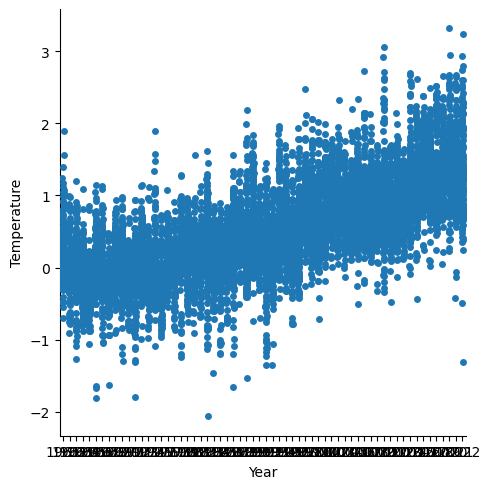

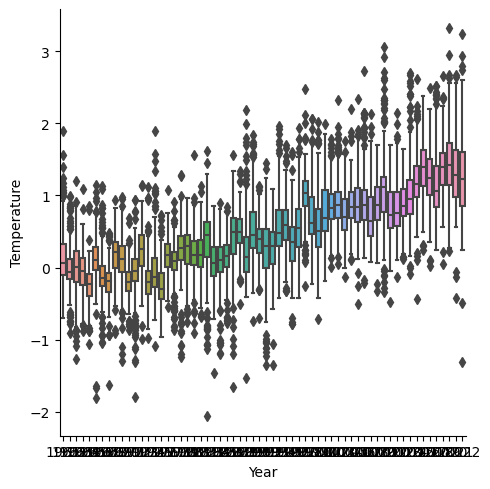

In [394]:
sns.catplot(x='Year',y='Temperature',kind='strip',data=long_data)
sns.catplot(x='Year',y='Temperature',kind='box',data=long_data)

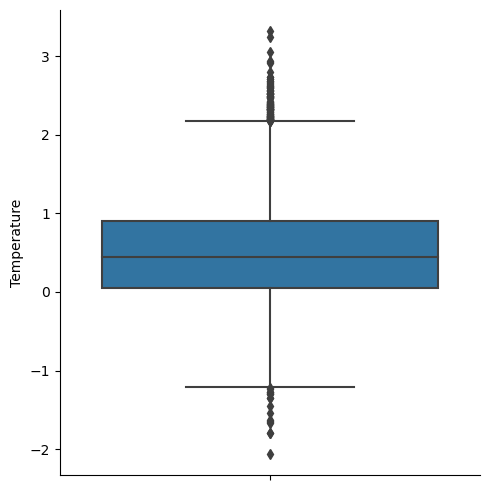

In [395]:
sns.catplot(y='Temperature',kind='box',data=long_data)

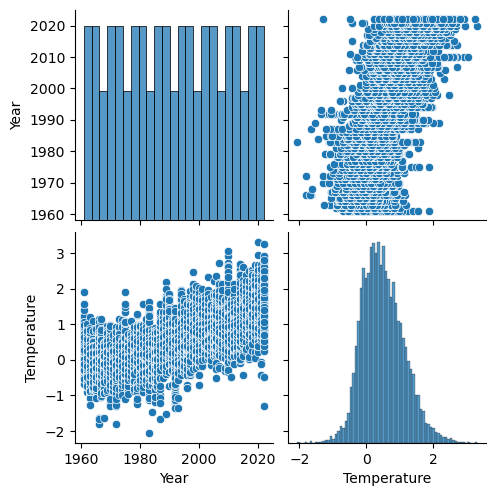

In [396]:
sns.pairplot(long_data)

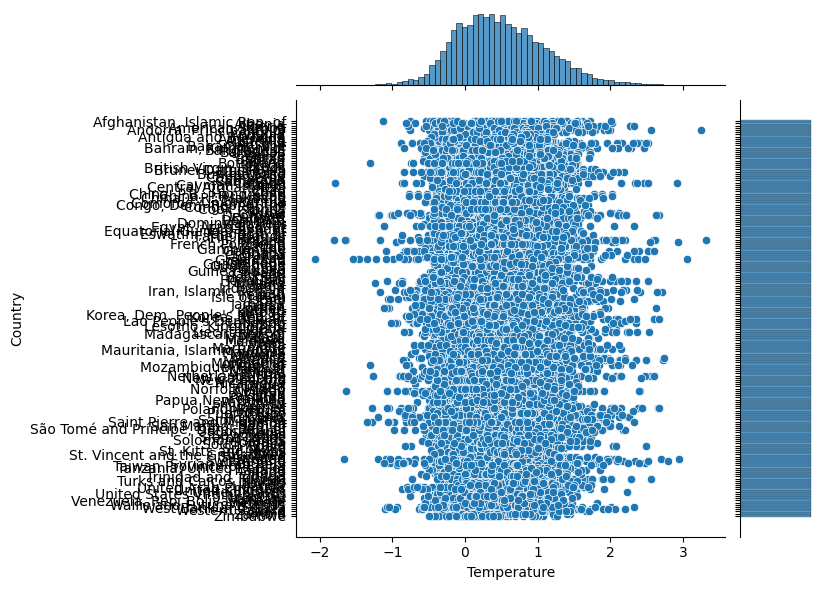

In [397]:
sns.jointplot(y='Country', x='Temperature', data=long_data)

# Made a new dataset, containing 62 rows corresponding to : 
62 years from 1961-2022

Parameters :
- Max : max temperature in that year
- Max-Country : country with max temperature 
- Max-Code : code with max temperature
- Min : min temperature in that year 
- Min-Country : country with min temperature 
- Min-Code : code with min temperature

In [398]:
new_data = pd.DataFrame()

for i in range(1961,2023):
    mask = long_data['Year'] == i
    max_row_index = long_data[long_data['Temperature'] == long_data[mask]['Temperature'].max()].index[0]
    min_row_index = long_data[long_data['Temperature'] == long_data[mask]['Temperature'].min()].index[0]
    
    row_to_append = pd.DataFrame([{
        'Year' : i,
        'Max' : long_data.iloc[max_row_index][3],
        'Max-Country': long_data.iloc[max_row_index][0],
        'Max-Code': long_data.iloc[max_row_index][1],
        'Min': long_data.iloc[min_row_index][3],
        'Min-Country': long_data.iloc[min_row_index][0],
        'Min-Code': long_data.iloc[min_row_index][1]
    }])

    new_data = pd.concat([new_data, row_to_append])
    
new_data = new_data.reset_index(drop=True)
new_data

,Year,Max,Max-Country,Max-Code,Min,Min-Country,Min-Code
0,1961,1.892,Finland,FI,-0.694,Niger,NE
1,1962,0.998,Syrian Arab Rep.,SY,-0.908,"Netherlands, The",NL
2,1963,1.202,Mongolia,MN,-1.270,"Netherlands, The",NL
3,1964,1.097,Iceland,IS,-0.877,Hungary,HU
4,1965,0.857,Mongolia,MN,-1.064,"Poland, Rep. of",PL
...,...,...,...,...,...,...,...
57,2018,2.524,Austria,AT,0.238,"Equatorial Guinea, Rep. of",GQ
58,2019,2.652,"Poland, Rep. of",PL,0.050,Liberia,LR
59,2020,3.317,Finland,FI,0.229,Sri Lanka,LK
60,2021,2.676,Kuwait,KW,-0.425,Djibouti,DJ


In [399]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         62 non-null     int64  
 1   Max          62 non-null     float64
 2   Max-Country  62 non-null     object 
 3   Max-Code     62 non-null     object 
 4   Min          62 non-null     float64
 5   Min-Country  62 non-null     object 
 6   Min-Code     62 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [400]:
new_data.describe()

,Year,Max,Min
count,62.000000,62.000000,62.000000
mean,1991.500000,1.690968,-0.694935
std,18.041619,0.695461,0.573862
min,1961.000000,0.476000,-2.062000
25%,1976.250000,1.103000,-1.060000
50%,1991.500000,1.668500,-0.709000
75%,2006.750000,2.170250,-0.238500
max,2022.000000,3.317000,0.250000


<Axes: xlabel='Year', ylabel='Max'>

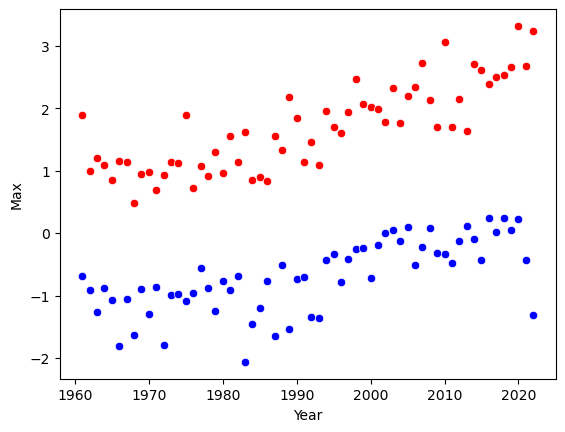

In [401]:
sns.scatterplot(x=new_data['Year'],y=new_data['Max'],color='red')
sns.scatterplot(x=new_data['Year'],y=new_data['Min'],color='blue')

C:\Users\kosur\AppData\Local\Temp\ipykernel_18960\1248523383.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\kosur\AppData\Local\Temp\ipykernel_18960\1248523383.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

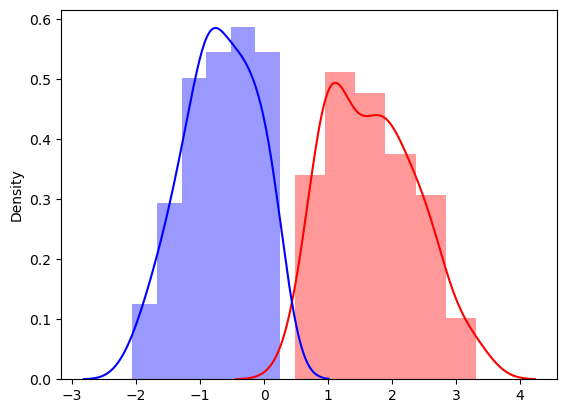

In [402]:
sns.distplot(x=new_data['Max'],color='red')
sns.distplot(x=new_data['Min'],color='blue')

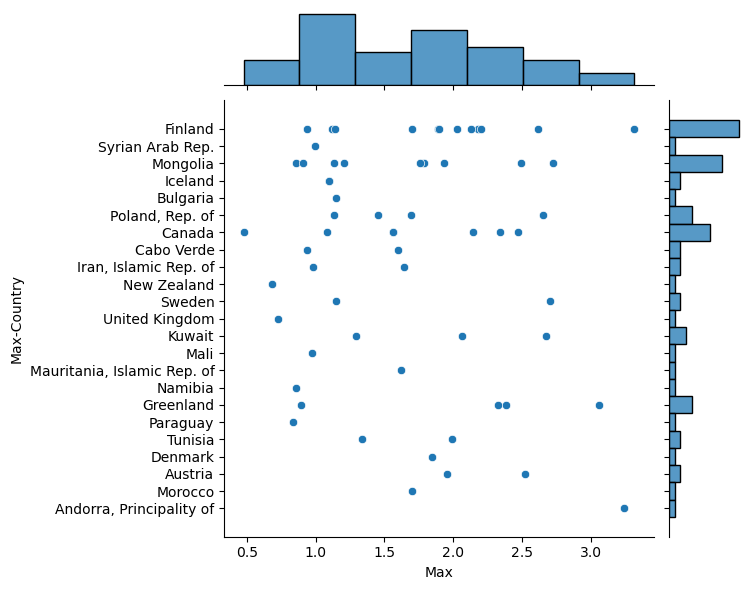

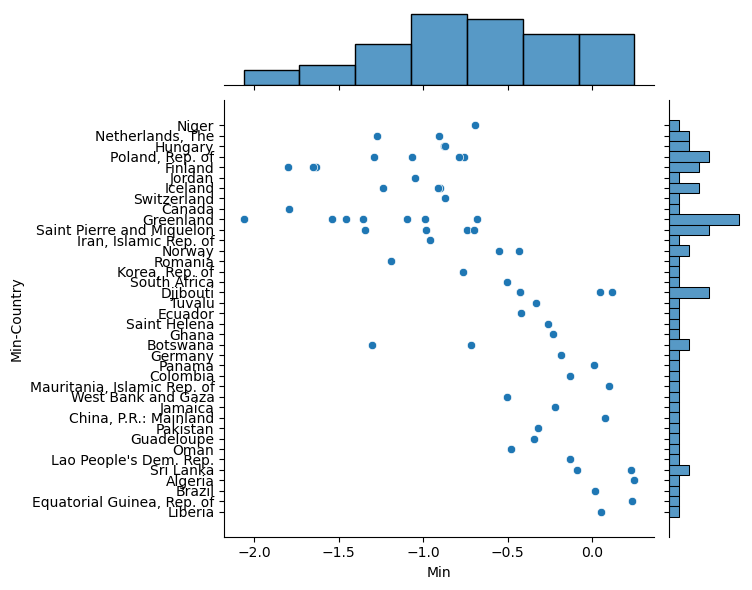

In [403]:
sns.jointplot(y='Max-Country', x='Max', data=new_data)
sns.jointplot(y='Min-Country', x='Min', data=new_data)

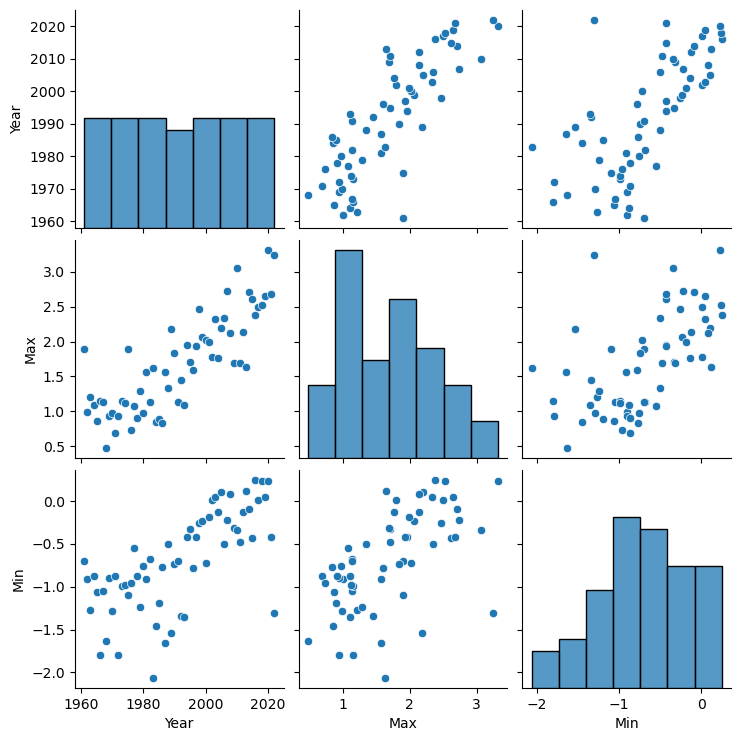

In [404]:
sns.pairplot(new_data)

# EDA on Wide Format 

In [405]:
wide_data.sample(5)

,Country,ISO2,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
18,Bolivia,BO,0.247,0.012,0.409,-0.123,0.220,-0.083,0.332,-0.162,...,0.507,0.955,1.533,0.824,0.981,0.562,0.921,1.315,0.738,0.644
97,"Madagascar, Rep. of",MG,0.522,-0.117,-0.310,-0.397,-0.588,-0.060,0.308,-0.418,...,0.749,0.777,1.134,1.147,1.379,0.983,1.438,1.137,1.194,0.860
122,Norfolk Island,NF,-0.315,0.396,0.100,0.170,-0.452,-0.265,0.201,-0.005,...,0.153,-0.005,0.532,1.050,0.717,0.700,0.667,0.705,0.613,1.225
38,"Congo, Dem. Rep. of the",CD,-0.030,-0.172,-0.038,-0.112,-0.193,0.109,-0.119,-0.158,...,1.003,0.976,1.053,1.546,1.320,1.450,1.483,1.692,1.658,1.480
160,Togo,TG,-0.066,-0.156,0.101,-0.145,-0.074,0.121,-0.231,-0.142,...,0.754,0.923,1.096,1.125,1.243,1.123,1.273,1.134,1.554,0.975


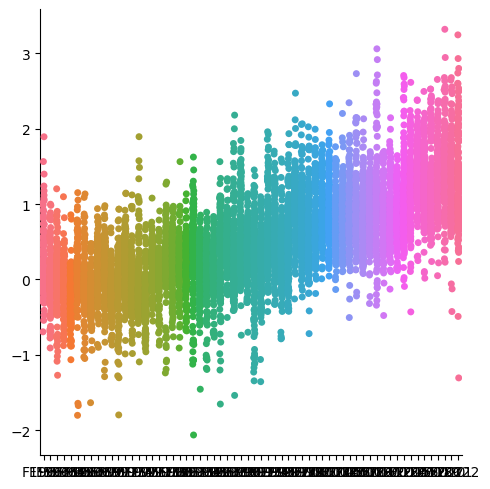

In [406]:
sns.catplot(wide_data)

In [407]:
columns = wide_data.columns

In [408]:
from ipywidgets import interact, widgets

df_list = []

for i in range(wide_data.shape[0]):
    y = wide_data['Country'][i]
    x = wide_data[wide_data['Country'] == y].to_numpy()
    x_coords = x[0][2:]
    
    df_country = pd.DataFrame({'Year': range(1961, 2023), 'Value': x_coords, 'Country': y})
    
    df_list.append(df_country)

df = pd.concat(df_list, ignore_index=True)

def update_plot(selected_country):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df[df['Country'] == selected_country], x='Year', y='Value', hue='Country')
    plt.title(f'Scatter Plot for {selected_country}')
    plt.show()

unique_countries = df_all['Country'].unique()

country_dropdown = widgets.Dropdown(options=unique_countries, description='Select Country:')

interact(update_plot, selected_country=country_dropdown)


interactive(children=(Dropdown(description='Select Country:', options=('Afghanistan, Islamic Rep. of', 'Albani…

<function __main__.update_plot(selected_country)>

# Max Temperature in given Year

In [409]:
def max_min_temp_in_the_year(year):
    mask = long_data['Year'] == year
    max_row_index = long_data[long_data['Temperature'] == long_data[mask]['Temperature'].max()].index[0]
    min_row_index = long_data[long_data['Temperature'] == long_data[mask]['Temperature'].min()].index[0]

    print('Year :',year)
    print('Max Temperature:',long_data.iloc[max_row_index][3])
    print('Max-Country :',long_data.iloc[max_row_index][0])
    print('Min Temperature :',long_data.iloc[min_row_index][3])
    print('Min-Country :',long_data.iloc[min_row_index][0])

In [410]:
max_min_temp_in_the_year(1982)

Year : 1982
Max Temperature: 1.135
Max-Country : Mongolia
Min Temperature : -0.682
Min-Country : Greenland


# Max Temperature in given Country

In [411]:
def max_min_temp_in_the_country(country):
    country_data = wide_data[wide_data['Country'] == country]
    numpy_data = country_data.to_numpy()
    
    x_coords = numpy_data[0][2:]
    max_indices = np.where(x_coords == x_coords.max())
    max_temp = x_coords[max_indices[0][0]]
    max_year = np.where(country_data == max_temp)
    
    
    min_indices = np.where(x_coords == x_coords.min())
    min_temp = x_coords[min_indices[0][0]]
    min_year = np.where(country_data == min_temp)
    
    print('Country :',country)
    print('Country-Code :',numpy_data[0][1])
    print('Max Temperature :',max_temp)
    print('Year with max temp :',country_data.columns[max_year[1][0]][1:])
    print('Min Temperature :',min_temp)
    print('Year with min temp:',country_data.columns[min_year[1][0]][1:])

In [412]:
max_min_temp_in_the_country('India')

Country : India
Country-Code : IN
Max Temperature : 1.134
Year with max temp : 2009
Min Temperature : -0.519
Year with min temp: 1971


# Time Series Forecasting

In [413]:
from prophet import Prophet

In [414]:
long_data

,Country,ISO2,Year,Temperature
0,"Afghanistan, Islamic Rep. of",AF,1961,-0.113
1,Albania,AL,1961,0.627
2,Algeria,DZ,1961,0.164
3,American Samoa,AS,1961,0.079
4,"Andorra, Principality of",AD,1961,0.736
...,...,...,...,...
11217,West Bank and Gaza,PS,2022,1.074
11218,Western Sahara,EH,2022,1.970
11219,World,ZM,2022,1.394
11220,Zambia,ZM,2022,0.686


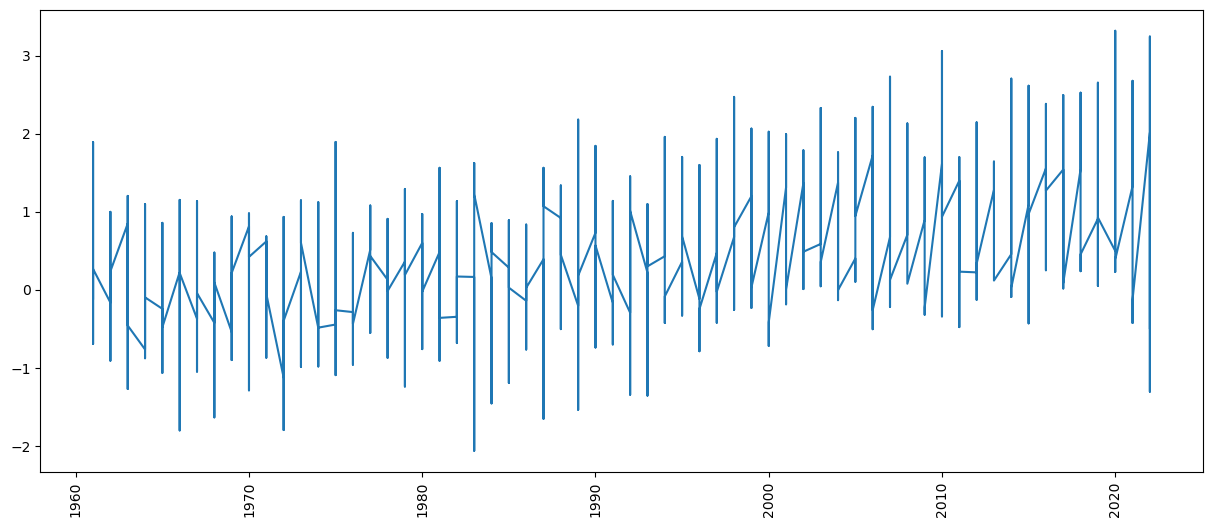

In [415]:
plt.figure(figsize=(15,6))
plt.plot(long_data['Year'],long_data['Temperature'])
plt.xticks(rotation='vertical')
plt.show()

In [416]:
m = Prophet()

In [417]:
time_data = long_data[['Year','Temperature']]

In [418]:
actual = pd.DataFrame(columns=['Year','Average Temp'])

for i in range(1961,2023):    
    x = time_data[time_data['Year'] == i]
    
    mean = x['Temperature'].mean()
    row_to_append = pd.DataFrame([{ "Year" : i, "Average Temp": mean}])
    
    actual = pd.concat([actual, row_to_append])

time_data = actual

In [419]:
time_data

,Year,Average Temp
0,1961,0.168829
0,1962,-0.010934
0,1963,-0.001066
0,1964,-0.070768
0,1965,-0.247564
...,...,...
0,2018,1.199459
0,2019,1.375702
0,2020,1.459641
0,2021,1.322906


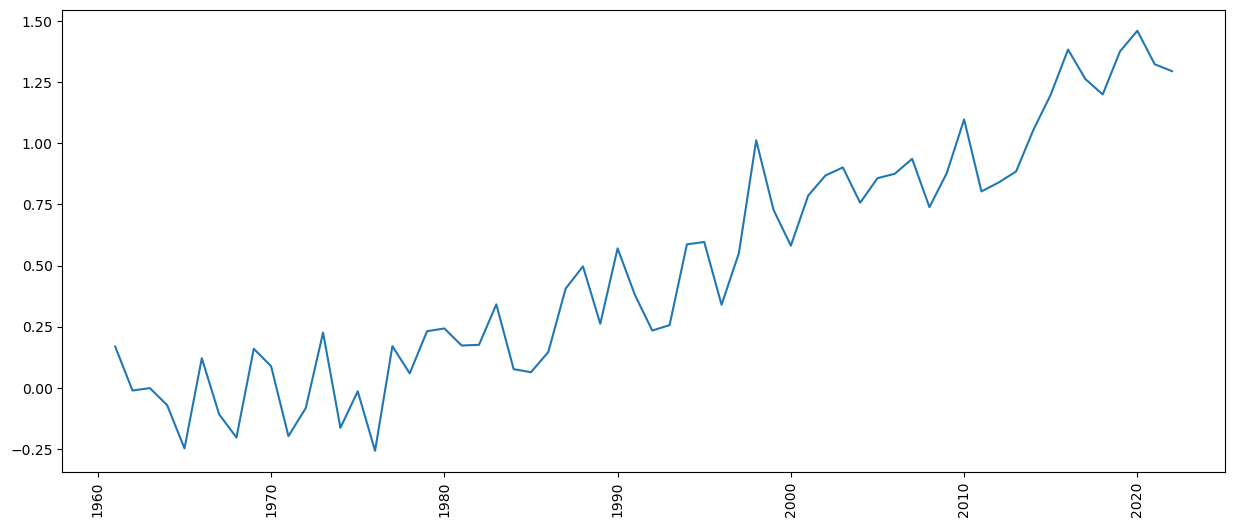

In [420]:
plt.figure(figsize=(15,6))
plt.plot(time_data['Year'],time_data['Average Temp'])
plt.xticks(rotation='vertical')
plt.show()

In [421]:
time_data.rename(columns={"Year": "ds", "Average Temp":"y"}, inplace=True)

In [422]:
time_data['ds']= pd.to_datetime(time_data['ds'],format='%Y')

In [423]:
model = m.fit(time_data)

15:30:08 - cmdstanpy - INFO - Chain [1] start processing
15:30:08 - cmdstanpy - INFO - Chain [1] done processing


In [424]:
future = m.make_future_dataframe(periods=50,freq='Y')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
107,2067-12-31,1.606791,1.744114,2.156761,1.606002,1.607570,0.341630,0.341630,0.341630,0.341630,0.341630,0.341630,0.0,0.0,0.0,1.948422
108,2068-12-31,1.631912,2.119976,2.540421,1.631101,1.632720,0.687437,0.687437,0.687437,0.687437,0.687437,0.687437,0.0,0.0,0.0,2.319349
109,2069-12-31,1.656964,2.050984,2.441086,1.656120,1.657806,0.594421,0.594421,0.594421,0.594421,0.594421,0.594421,0.0,0.0,0.0,2.251385
110,2070-12-31,1.682017,1.954678,2.374830,1.681141,1.682884,0.479089,0.479089,0.479089,0.479089,0.479089,0.479089,0.0,0.0,0.0,2.161106
111,2071-12-31,1.707069,1.858326,2.257879,1.706165,1.707964,0.341630,0.341630,0.341630,0.341630,0.341630,0.341630,0.0,0.0,0.0,2.048699


In [425]:
from prophet.plot import plot_plotly,plot_components_plotly

plot = plot_plotly(m, forecast)
plot.show()

In [426]:
plot_components_plotly(m, forecast)